# Principal components analysis

In [1]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Small example
Suppose we have 9 points on the plane, defined by their $(x,y)$ coordinates

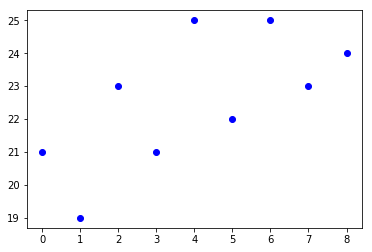

In [2]:
x = arange(0,9)
y = [21, 19, 23, 21, 25, 22, 25, 23, 24]
plot(x,y,'bo');

* These points are close to a straight line trending upwoards. We would like to find that line. 

* The line is described by a function of the form: $f_{w_0,w_1}(x) \doteq w_0+w_1 x$

* our goal is to find $w_0$ and $w_1$.

* In a previous notabooke we saw how to find a line that passes through 2 points.

* As here we have more than two points the system is **overconstrained** - there is no straight line that passes through all of the points.

* The points do not fall **exactly** on a line. So we are looking for $w_0,w_1$ 
such that the line is **closest** to the points.

We define the **Square difference** between the line $(w_0,w_1)$ and the points
$\langle (x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n) \rangle$ to be 
$$\sum_{i=1}^n [f_{w_0,w_1}(x_i)-y_i]^2$$
(In our example $n=9$)

The values of $w_0,w_1$ which minimize the square difference, are called the **least squares** solution.

We use `numpy.linalg` to find the minimum. 

To define the problem for `numpy.linalg` we use matrix notation. We define ${\bf A}$ to be the $n$ by $2$ matrix:
$${\bf A} =  \begin{pmatrix}
 1, x_1\\
 \vdots\\
 1, x_n
 \end{pmatrix} 
$$

 ${\bf y}$ and ${\bf w}$ to be column vectors:
 $${\bf y} =  \begin{pmatrix}
 y_1\\
 \vdots\\
 y_n
 \end{pmatrix} 
 ,\;\;\;\;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$$

We can then express the differences as a vector ${\bf d}$:
$$ {\bf d} = {\bf A} {\bf w} - {\bf y} $$

The square difference, that we wish to minimize, is $\|{\bf d}\|_2^2 = \sum_{i=1}^n d_i^2$

In [3]:
A = array([ ones(9),x ])
# linearly generated sequence
w = linalg.lstsq(A.T,y)[0] # obtaining the parameters

## PCA
To be completed.

In [4]:
A = array(list(zip(x,y)))

def PCA(A):
    Mean= mean(A.T,axis=1) # Compute the location of the mean.
    M = (A-Mean).T # subtract the mean (along columns)
    [eigvals,eigvecs] = linalg.eig(cov(M))
    order=argsort(eigvals)[-1::-1] # ordering vectors so that eigen-values decreasing order
    print('order=',order)
    eigvals=eigvals[order]
    eigvecs=eigvecs[:,order]
    eigvecs=eigvecs.T
    return Mean,eigvals,eigvecs

Mean,eigvals,eigvecs = PCA(A)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)

order= [0 1]
Mean= [ 4.         22.55555556]
eigvals= [9.78318072 1.74459706]
eigvecs=
 [[ 0.84615144  0.53294253]
 [-0.53294253  0.84615144]]


In [5]:
def project(x,u):
    return Mean+(x-Mean).dot(u)*u
project(A[3],eigvecs[0,:])

def plot_PCA(x,y,Mean,eigvecs,eigvals,plotAll=0,marker='o',markersize=10):
    plot(x,y,marker,markersize=markersize);
    if plotAll==0:
        return
    plot(Mean[0],Mean[1],'kX',markersize=20);
    if plotAll==1:
        return
    colors=['r','m']
    for i in range(2):
        principle=eigvecs[i,:]
        std=sqrt(eigvals[i])*2
        p1=Mean-principle*std
        p2=Mean+principle*std
        plot([p1[0],p2[0]],[p1[1],p2[1]],colors[i])
        p1=Mean
        p2=Mean+principle
        plot([p1[0],p2[0]],[p1[1],p2[1]],'k',linewidth=4)

def plot_projections(A,eigvecs):
    for i in range(A.shape[0]):
        pt=A[i,:]
        proj=project(pt,eigvecs[0,:])
        plot([pt[0],proj[0]],[pt[1],proj[1]],'g')
def plot_regress_projections(x,y,w):
    line = w[0]+w[1]*x # regression line
    plot(x,line,'k-')

    for i in range(len(x)):
        plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'y')   



(-0.4, 8.4, 18.7, 25.3)

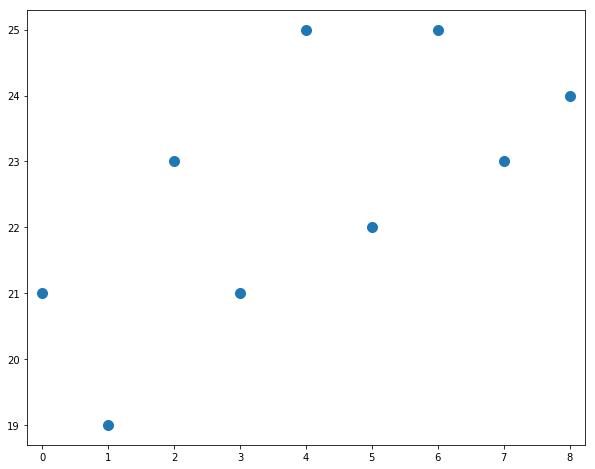

In [6]:
#plotting data and mean
figure(figsize=[10,8])
plot_PCA(x,y,Mean,eigvecs,eigvals)
plt.axis('equal')

(-0.4, 8.4, 18.7, 25.3)

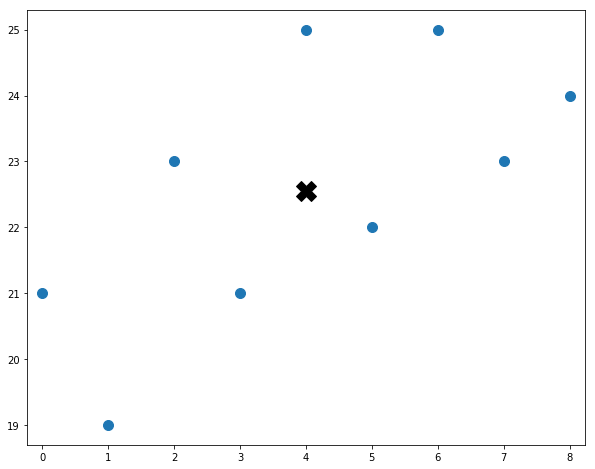

In [7]:
figure(figsize=[10,8])
plot_PCA(x,y,Mean,eigvecs,eigvals,plotAll=1)
plt.axis('equal')

(-1.822517708340842, 9.822517708340841, 18.655528051071524, 26.233910927497995)

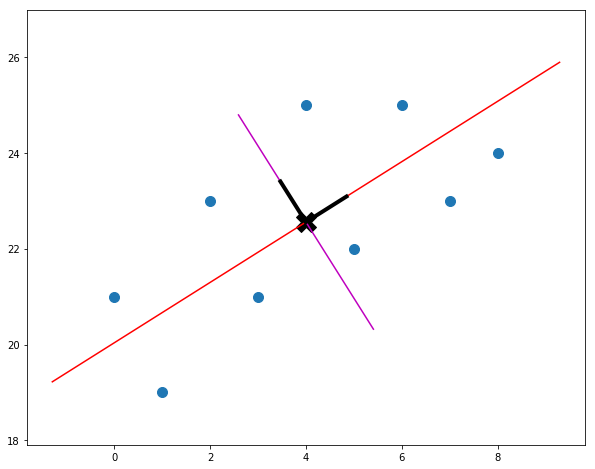

In [8]:
figure(figsize=[10,8])
plot_PCA(x,y,Mean,eigvecs,eigvals,plotAll=2)
plt.axis('equal')

(-1.822517708340842, 9.822517708340841, 18.655528051071524, 26.233910927497995)

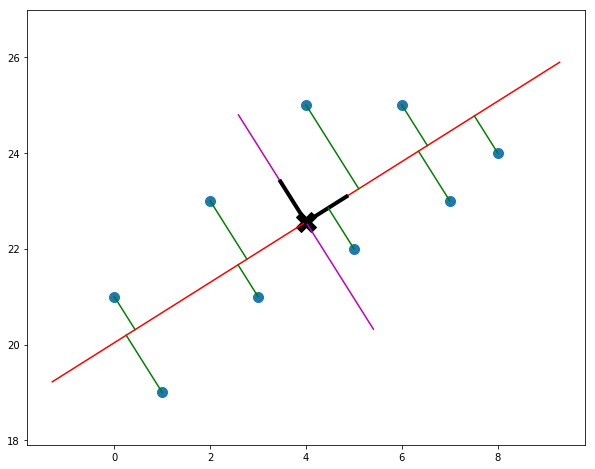

In [9]:
figure(figsize=[10,8])
plot_PCA(x,y,Mean,eigvecs,eigvals,plotAll=2)
plot_projections(A,eigvecs)
#plot_regress_projections(x,y,w)
plt.axis('equal')
#grid()

## A real-life example
We now turn our attention to the analysis of some real-word data. This data describes  the weight and height of some 25,000 people.

Weight/Weight data downloaded from [here](https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html)

In [10]:
HW=pd.read_csv('../../Data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()


FileNotFoundError: File b'../../Data/HW25000.csv' does not exist

In [ ]:
V=HW.var()
V.Height,V.Weight
HW['Height']=HW['Height']*(np.sqrt(V.Weight/V.Height))
HW.var()

In [ ]:
from math import sin,cos
def rotate(data,theta):
    Mean= mean(data.T,axis=1)
    M=np.array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    return (data-Mean).dot(M.T)+Mean


In [ ]:
_array=rotate(np.array(HW),0)
Mean,eigvals,eigvecs = PCA(_array)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)

In [ ]:
#plotting 
figure(figsize=[10,10])
subplot(221)
plot_PCA(_array[:,0],_array[:,1],Mean,eigvecs,eigvals,marker='.',markersize=1,plotAll=2)
plt.axis('equal')
plt.title('original data')
plt.xlabel('Weight')
plt.ylabel('Height')
grid()

_shifted = _array-Mean
subplot(222)
plot_PCA(_shifted[:,0],_shifted[:,1],np.array([0,0]),eigvecs,eigvals,marker='.',markersize=1,plotAll=2)
plt.axis('equal')
plt.title('Mean shifted to zero')
plt.xlabel('Weight - mean(Weight)')
plt.ylabel('Height - mean(Height)')
grid()

_rotated=_shifted.dot(eigvecs.T)
subplot(223)
plot_PCA(_rotated[:,0],_rotated[:,1],np.array([0,0]),np.array([[1,0],[0,1]]),\
         eigvals,marker='.',markersize=1,plotAll=2)
plt.axis('equal')
plt.title('rotated to major axis')
plt.xlabel('First Eigen-Vector')
plt.ylabel('Second Eigen-Vector')
grid()




## PCA in 2D: Summary

* **First Normalization** - subtracting the mean - shifting the distribution to the origin.
* The first eigenvector is in the direction of the largest spread = largest variance.
* The first eigen-value is the variance in the direction of the first eigenvector.
* **Second normalization** - Rotating the coordinates so that $x$ is the first eigen-vector $y$ is the second eigen-vector.
* **Dimensionality reduction** - Keeping only the coefficients of the top $k$ eigenvectors.
* **Approximate Reconstruction** of the vector $\vec{v}$ using the top $k$ eigenvectors: 
$$\vec{v}_k = \sum_{i=1}^k (\vec{v}\cdot \vec{u}_i) \vec{u}_i$$

### PCA in 2D and computer vision.
Sometimes it makes sense to approximate small regions, or "blobs" using ellipses.

PCA provides  a simple and efficient way for doing that.


In [ ]:
n=100
image=np.zeros([n,n])
theta=pi/7
scale_x=0.2
scale_y=1
Scale=np.array([[scale_x,0],[0,scale_y]])
M=np.array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
P=M.dot(Scale)
for i in arange(-n/2,n/2,.5):
    for j in arange(-n/2,n/2,.5):
        if max(abs(i),abs(j))<30:
            v=np.array([i,j])
            s=P.dot(v)+np.array([n/2,n/2])
            x,y=[int(a) for a in s]
            image[x,y]=1
imshow(image)

In [ ]:
nz=np.array(nonzero(image))
shape(nz)

In [ ]:
Mean,eigvals,eigvecs = PCA(nz.T)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)

In [ ]:
figure(figsize=[10,10])
plot_PCA(nz[0,:],nz[1,:],Mean,eigvecs,eigvals,marker='.',markersize=1)
plt.axis('equal')
plt.title('original data')
grid()
